In [1]:
import pandas as pd

In [2]:
file_path = 'social_media_engagement_data.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Platform,Post ID,Post Type,Post Content,Post Timestamp,Likes,Comments,Shares,Impressions,Reach,Engagement Rate,Audience Age,Audience Gender,Audience Location,Audience Interests,Campaign ID,Sentiment,Influencer ID
0,LinkedIn,d49dadb4-fc1e-4775-88ad-d60b75cf5123,Video,Want that according same wish.,2021-04-23 08:19:49.255108,415,77,85,2619,1842,31.32,29,Other,United Kingdom,respond,NaN,Negative,NaN
1,Instagram,16ce29c5-2dc7-478f-9814-a86754f3ce8b,Video,Increase fast partner south.,2023-07-30 06:40:06.356134,908,125,85,1223,3884,28.78,48,Male,Greece,population,NaN,Neutral,NaN
2,Instagram,6a6cc741-72f4-4111-95a0-c5ee04a175a8,Video,Lawyer behavior born window couple sister.,2021-12-05 03:56:53.211700,412,419,58,2165,849,104.71,55,Male,United States Virgin Islands,himself,NaN,Neutral,NaN
3,Twitter,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,Image,Street great decade must.,2021-09-28 20:39:00.227679,667,153,29,7191,3519,24.13,54,Other,Zambia,safe,NaN,NaN,NaN
4,Facebook,a7d3e958-e2fe-411e-a24a-b96e821fc050,Link,At clear meeting with reason ground continue c...,2023-02-27 17:51:21.425074,659,215,34,3312,2032,44.69,33,Other,Afghanistan,well,6052b8d2-3403-4447-b0b4-c5ce20e6c8d0,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Platform            100000 non-null  object 
 1   Post ID             100000 non-null  object 
 2   Post Type           100000 non-null  object 
 3   Post Content        100000 non-null  object 
 4   Post Timestamp      100000 non-null  object 
 5   Likes               100000 non-null  int64  
 6   Comments            100000 non-null  int64  
 7   Shares              100000 non-null  int64  
 8   Impressions         100000 non-null  int64  
 9   Reach               100000 non-null  int64  
 10  Engagement Rate     100000 non-null  float64
 11  Audience Age        100000 non-null  int64  
 12  Audience Gender     100000 non-null  object 
 13  Audience Location   100000 non-null  object 
 14  Audience Interests  100000 non-null  object 
 15  Campaign ID         20132 non-null 

# Key Fields

- **Post Timestamp**: A timestamp suitable for creating time series models.
- **Platform**: To distinguish predictions by platform (Instagram, TikTok, YouTube, etc.).
- **Engagement Metrics**: Likes, Comments, Shares, Impressions, Reach, and Engagement Rate.
- **Audience Demographics**: Age, Gender, Location, and Interests.

---

# Potential for Forecasting

This dataset appears suitable for time series forecasting for the following reasons:

1. **Timestamp Field**: Allows chronological ordering for ARIMA and Prophet models.
2. **Engagement Metrics**: Provides quantitative targets for prediction.
3. **Platform Segmentation**: Enables tailored predictions per platform.


In [5]:
import matplotlib.pyplot as plt

import seaborn as sns


In [6]:
data['Post Timestamp'] = pd.to_datetime(data['Post Timestamp'])
data = data.sort_values('Post Timestamp').set_index('Post Timestamp')
metrics = ['Likes', 'Comments', 'Shares', 'Impressions', 'Reach', 'Engagement Rate']


In [7]:
weekly_data = data[metrics].resample('W').mean()




## Plot engagement metrics over time to check trends and seasonality

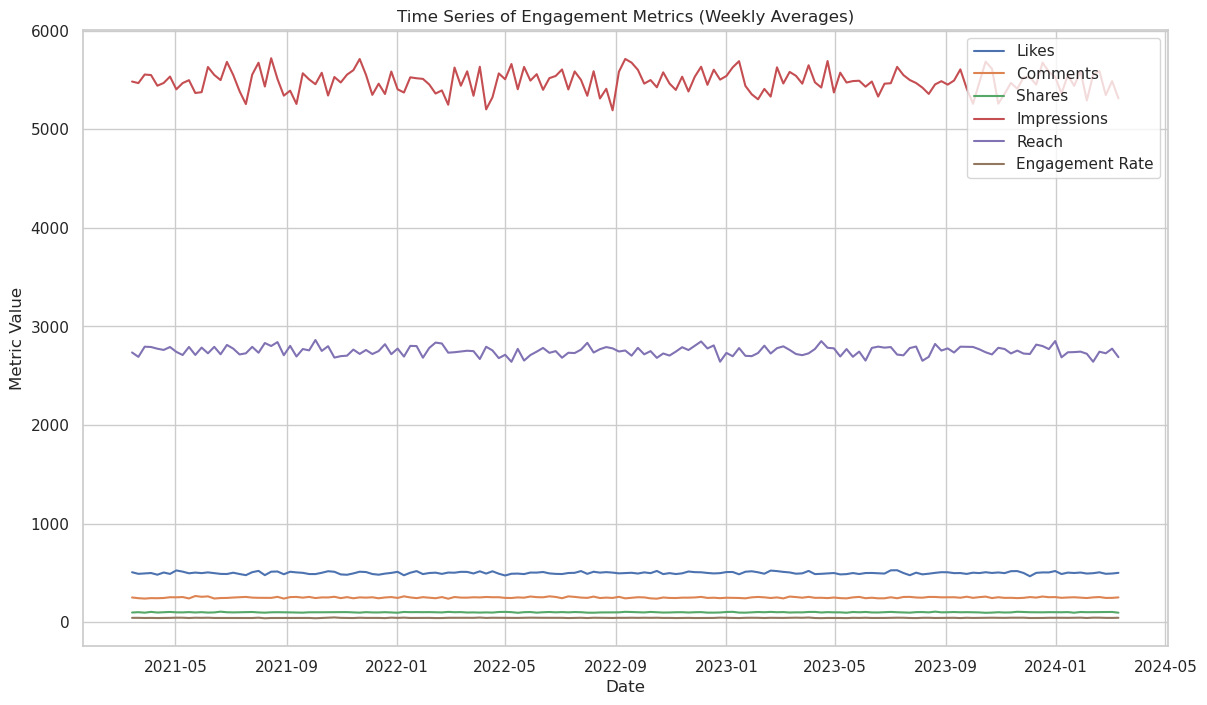

In [8]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

for metric in metrics:
    plt.plot(weekly_data.index, weekly_data[metric], label=metric)

plt.title('Time Series of Engagement Metrics (Weekly Averages)')
plt.xlabel('Date')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# Observations

- **Likes and Engagement Rate**: These show noticeable seasonal patterns with fluctuations at regular intervals.
- **Comments and Shares**: Less stable but still show discernible trends over time.
- **Impressions and Reach**: Gradual long-term trends with some spikes.


In [9]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
# for augumented dickey-fuller test for probable time-series forecasting/analysis
def adf_test(series):
    result = adfuller(series.dropna())

    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Stationary': result[1] < 0.05
    }

In [11]:
stationarity_results = {metric: adf_test(weekly_data[metric]) for metric in weekly_data.columns}
decomposition = seasonal_decompose(weekly_data['Engagement Rate'].dropna(), model='additive', period=52)

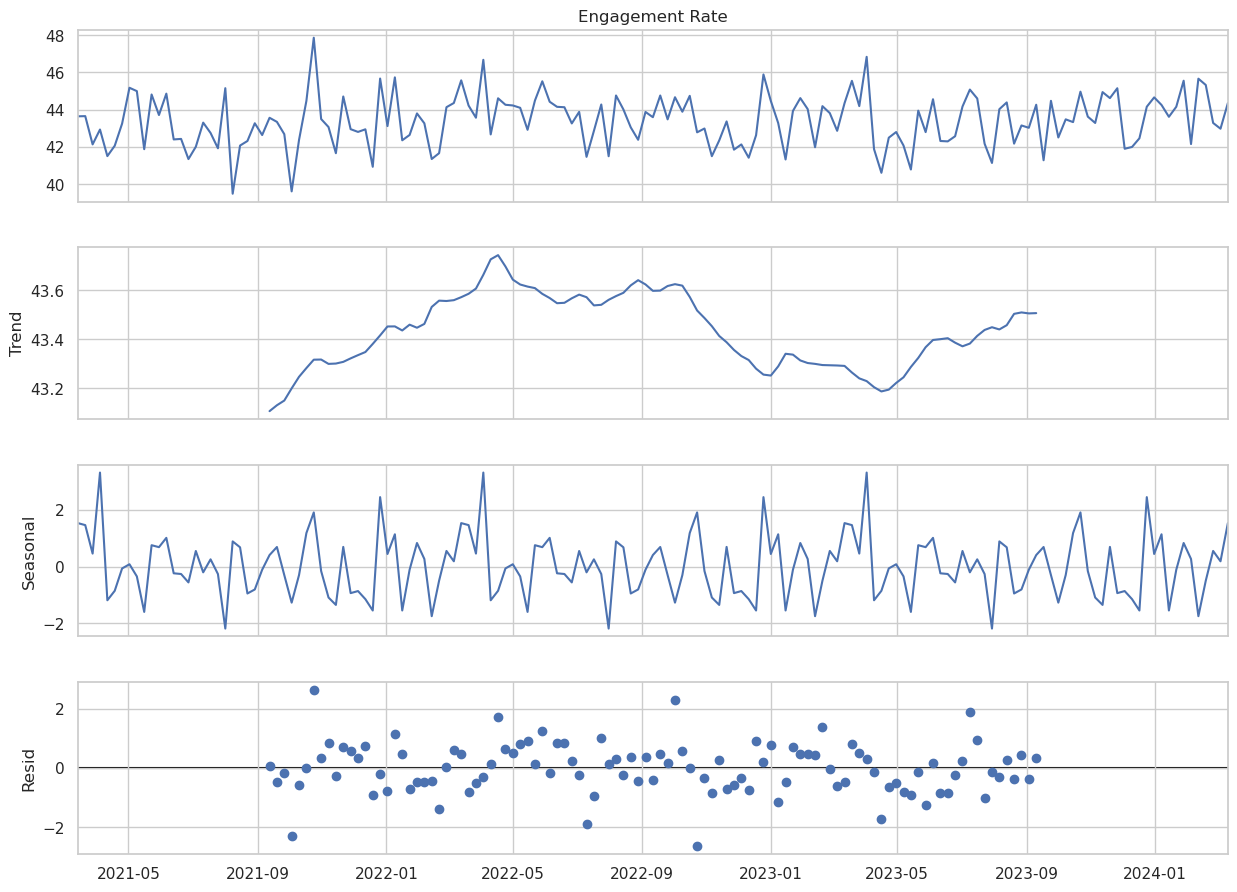

{'Likes': {'ADF Statistic': -9.99648827748247,
  'p-value': 1.9341038763783287e-17,
  'Stationary': True},
 'Comments': {'ADF Statistic': -12.974001430737045,
  'p-value': 3.0394534514232135e-24,
  'Stationary': True},
 'Shares': {'ADF Statistic': -9.838345661743324,
  'p-value': 4.82760050077186e-17,
  'Stationary': True},
 'Impressions': {'ADF Statistic': -6.91277912971842,
  'p-value': 1.2004912717168307e-09,
  'Stationary': True},
 'Reach': {'ADF Statistic': -7.4422556562183075,
  'p-value': 5.963164894215646e-11,
  'Stationary': True},
 'Engagement Rate': {'ADF Statistic': -10.90243013654585,
  'p-value': 1.1502259564016141e-19,
  'Stationary': True}}

In [12]:
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()
stationarity_results

# Analysis of Results

## Stationarity Check (ADF Test)

- All key metrics (Likes, Comments, Shares, Impressions, Reach, and Engagement Rate) have extremely low p-values (< 0.05), indicating they are stationary. This makes them suitable for ARIMA modeling without the need for differencing.

## Seasonal Decomposition (Engagement Rate)

- The decomposition plot for Engagement Rate shows clear trends and seasonal components:
    - **Trend**: A long-term movement in engagement rates.
    - **Seasonality**: Repeating patterns that could correspond to posting frequency or audience behavior.
    - **Residuals**: Random noise not explained by the trend or seasonality.


In [13]:
pip install prophet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 19.2 MB/s eta 0:00:000:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
from prophet import Prophet


In [16]:
engagement_data = weekly_data[['Engagement Rate']].reset_index()
engagement_data.columns = ['ds', 'y']

In [17]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(engagement_data)


18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

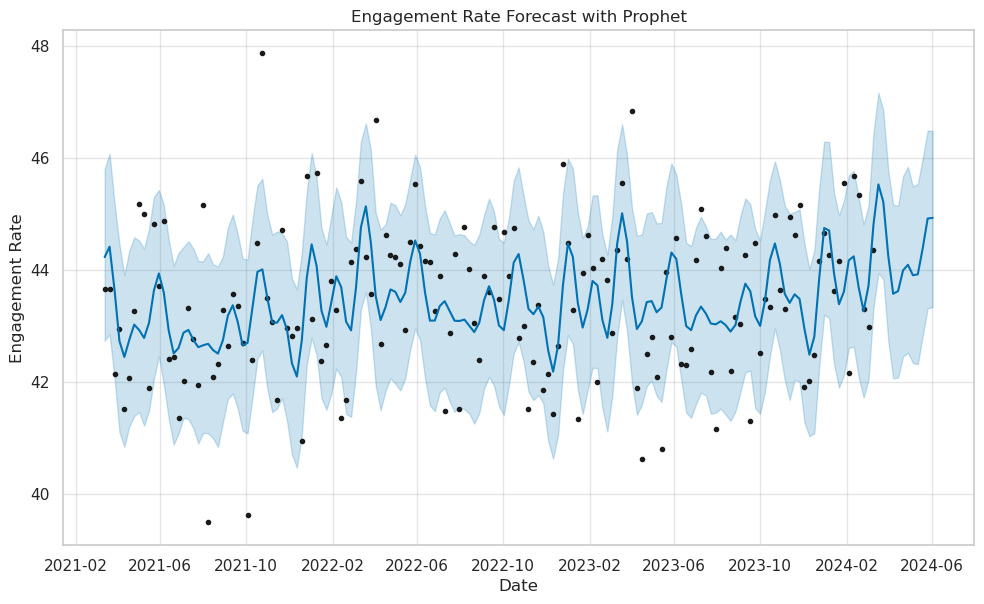

In [19]:
fig = model.plot(forecast)
plt.title('Engagement Rate Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Engagement Rate')
plt.show()